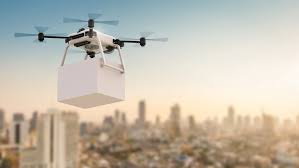
<h1><center>Hash Code Archive: Drone Delivery - EDA</center><h1>
    
# 1. <a id='1'>Introduction 🃏 </a>

The Internet has profoundly changed the way we buy things, but the online shopping of today is likely not the end of that change; the expectations for purchase delivery has gone from a week, to two days, to one day, to same day. What about in just a few hours? With drones, this may be possible, and they’ll bring a whole new fleet of problems to solve with data science.

Drones are­ autonomous, electric vehicles often used to deliver online purchases. Current experiments use flying drones, so they’re never stuck in traffic. As drone technology improves every year, there remains a major issue: how would we manage and coordinate all those drones?

In [ ]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/3HJtmx5f1Fc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

In this competition, you are given a hypothetical fleet of drones, a list of customer orders, and availability of the individual products in warehouses. Can you schedule the drone operations so that the orders are completed as soon as possible?

When flying delivery drones become the norm, scheduling is one of the many problems to be solved. Get a head start—and improve your data science skills at the same time.

### 1.1 Task

- Given a fleet of drones, a list of customer orders and availability of the individual products in warehouses, schedule the drone operations so that the orders are completed as soon as possible.


# 2. <a id='2'>Importing the necessary libraries📗</a> 

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

# 3. <a id='3'>Basic EDA</a> 

## 3.1. File Format

we can read `busy_day.in` and see below text format.

In [ ]:
with open('../input/hashcode-drone-delivery/busy_day.in') as file:
    line_list = file.read().splitlines()

In [ ]:
len(line_list)

In [ ]:
line_list[:4]

In `hashcode_delivery_instructions.pdf`, we know what each section in the file is.

`1`: parameters of the simulation

`2`: weights of the products available for orders

`3`: warehouses and availability of individual product types

`4`: customer orders

## 3.2. Read Each Sections

### Simulation

First section means `parameters of the simulation`.

In [ ]:
first_section = line_list[0].split()
first_section

`400`: rows - number of rows in the area of the simulation (min:1, max:10000)

`600`: columns - number of rows in the area of the simulation (min:1, max:10000)

`30`: drons - number of drones available (min: 1, max: 1000)

`112993`: turns - this is the simulation of drone delivery, it proceeds in `112993` turns. (min: 1, max: 1000000)

`200` : max payload - maximum load of a drone (min: 1, max: 10000)

### Product

In [ ]:
second_section = line_list[1].split()
second_section

There are `400` different product types.

In [ ]:
third_section = line_list[2].split()
len(third_section)

`400`: length of product types weights

In [ ]:
third_section[:10]

### Warehouse

In [ ]:
fourth_section = line_list[3].split()
fourth_section

There are `10` warehouses.

In [ ]:
fifth_section = line_list[4].split()
fifth_section

First warehouse is loacated at `113, 179`.

In [ ]:
sixth_section = line_list[5].split()
len(sixth_section)

First warehouse stores `400` items. It can contains `0`, so we need to check this list.

In [ ]:
seventh_section = line_list[6].split()
seventh_section

Second warehouse is loacated at `234, 599`.

In [ ]:
eightth_section = line_list[7].split()
len(eightth_section)

we can check `10` + `10` sections for warehouses. Later, we will look whole list.

### Order

In [ ]:
order_section = line_list[24].split()
order_section

There are `1250` orders.

In [ ]:
first_order_delivered = line_list[25].split()
first_order_delivered

First order to be delivered to `340, 371`.

In [ ]:
first_order_items = line_list[26].split()
first_order_items

First order contains `8` items.

Simillar to sections for warehouses, we can check `1250` + `1250`. 

In [ ]:
len(line_list)

# 4. <a id='4'>Get Dataframe for each section</a> 

* https://www.kaggle.com/jpmiller/data-extraction-and-eda

In [ ]:
# Products
weights = line_list[2].split()
products_df = pd.DataFrame({'weight': weights})

wh_count = int(line_list[3])
wh_endline = (wh_count*2)+4

wh_invs = line_list[5:wh_endline+1:2]
for i, wh_inv in enumerate(wh_invs):
    products_df[f'wh{i}_inv'] = wh_inv.split()

products_df = products_df.astype(int)

# Warehouses
wh_locs = line_list[4:wh_endline:2]
wh_rows = [wl.split()[0] for wl in wh_locs]
wh_cols = [wl.split()[1] for wl in wh_locs]

warehouse_df = pd.DataFrame({'wh_row': wh_rows, 'wh_col': wh_cols}).astype(np.uint16)

# Orders
order_locs = line_list[wh_endline+1::3]
o_rows = [ol.split()[0] for ol in order_locs]
o_cols = [ol.split()[1] for ol in order_locs]

orders_df = pd.DataFrame({'row': o_rows, 'col': o_cols})

orders_df[orders_df.duplicated(keep=False)].sort_values('row')

orders_df['product_count'] = line_list[wh_endline+2::3]

order_array = np.zeros((len(orders_df), len(products_df)), dtype=np.uint16)
orders = line_list[wh_endline+3::3]
for i,ord in enumerate(orders):
    products = [int(prod) for prod in ord.split()]
    order_array[i, products] = 1

df = pd.DataFrame(data=order_array, columns=['p_'+ str(i) for i in range(400)], 
                    index=orders_df.index)

orders_df = orders_df.astype(np.uint16).join(df)

In [ ]:
products_df.head()

In [ ]:
warehouse_df.head()

In [ ]:
orders_df.head()

In [ ]:
len(orders_df)

# 5. <a id='5'>Visualization</a> 

https://www.kaggle.com/shams1/data-extraction-and-eda

In [ ]:
chart_opts = {'width': 500,
              'xlabel': "Total Demand",
              'ylabel': "Count of Products"}

import holoviews as hv
from holoviews import dim, opts
hv.extension('bokeh')

counts = orders_df.product_count \
                  .value_counts() \
                  .sort_index() \
                  .reset_index()
hv.Bars(counts).opts(**chart_opts)

In [ ]:
supply = products_df.drop(columns='weight').sum(axis=1)
supply

demand = orders_df.loc[:, orders_df.columns.str.contains("p_")].sum()
demand

surplus = supply.to_numpy() - demand.to_numpy()
print(np.amin(surplus))


freqs, edges = np.histogram(surplus, 20)
hv.Histogram((edges, freqs)).opts(width=600, xlabel="surplus")

In [ ]:
chart_opts = {'width': 500,
              'xlabel': "Warehouse",
              'ylabel': "Total Inventory",
              'yticks': list(range(0,1801,200))}


total_prods = products_df.loc[:, products_df.columns.str.contains("wh")].sum()
hv.Bars(total_prods.value_counts().index).opts(**chart_opts)

In [ ]:
hv.Distribution(products_df.weight).opts(width=500)

In [ ]:
chart_opts = dict(width=600, height=400, alpha=0.7)

customers = hv.Points(orders_df, kdims = ['col', 'row']).opts(**chart_opts)
warehouses = hv.Points(warehouse_df, kdims = ['wh_col', 'wh_row']).opts(size=8, **chart_opts)
customers * warehouses

https://www.kaggle.com/jpmiller/application-of-google-or-tools

In [ ]:
from scipy.spatial import distance_matrix
from ortools.graph import pywrapgraph
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
def list_lines(file_name):
    """Returns a list of integer lists."""
    with open(file_name) as file:
        lines = file.read().splitlines()
    line_list = [[int(n) for  n in ll.split()] for ll in lines]
    return line_list

def list_lines(file_name):
    """Returns a list of integer lists."""
    with open(file_name) as file:
        lines = file.read().splitlines()
    line_list = [[int(n) for  n in ll.split()] for ll in lines]
    return line_list


def set_params(line_list):
    top_line = line_list[0]
    params = {'DRONE_COUNT': top_line[2],
              'WT_CAP': top_line[4],
              'END_TIME': top_line[3],
              }
    return params


def find_wh_lines(line_list):
    """Provides the dividing line between warehouse and
    order sections in the line list."""
    wh_count = line_list[3][0]
    wh_endline = (wh_count*2)+4
    return wh_endline


def get_weights(line_list):
    weights = np.array(line_list[2])
    return weights.astype(np.int16)


def get_inventories(line_list):
    """Returns a 2-d array of P products by W warehouses."""
    wh_endline = find_wh_lines(line_list)
    invs = line_list[5:wh_endline+1:2]
    supply = np.array(invs).transpose()
    return supply.astype(np.int16)


def get_orders(line_list):
    """Returns a 2-d array of P products by C orders."""
    wh_endline = find_wh_lines(line_list)
    demand = np.zeros((line_list[1][0], line_list[wh_endline][0]),
                            dtype=np.int16)
    orders = line_list[wh_endline+3::3]
    for i,ord in enumerate(orders):
        for prod in ord:
            demand[prod, i] += 1
    return demand.astype(np.int16)


def get_locs(line_list):
    wh_endline = find_wh_lines(line_list)
    wh_locs = np.array(line_list[4:wh_endline:2])
    cust_locs = np.array(line_list[wh_endline+1::3])
    return wh_locs.astype(np.int16), cust_locs.astype(np.int16)

In [ ]:
import holoviews as hv
hv.extension('bokeh')

files = ['../input/hashcode-drone-delivery/busy_day.in']
line_list = list_lines(files[0])

params = set_params(line_list)
supply = get_inventories(line_list)
demand = get_orders(line_list)
wh_locs, cust_locs = get_locs(line_list)
weights = get_weights(line_list)

In [ ]:
print(params)

freqs, edges = np.histogram(weights, 20)
wt_prod = hv.Histogram((edges, freqs)).options(xlabel="product weights"
                                               ,width=250)

order_weights = (weights.reshape(weights.size, -1)* demand) \
                    .sum(axis=0)
freqs, edges = np.histogram(order_weights, 20)
wt_orders = hv.Histogram((edges, freqs)).options(xlabel="order weights",
                                                 width=400)

surplus = hv.Curve(supply.sum(axis=1) - demand.sum(axis=1)).options(width=500,
                                            xlabel='product', ylabel='surplus')

customers = hv.Points(np.fliplr(cust_locs)).options(width=600, height=400)
warehouses = hv.Points(np.fliplr(wh_locs)).options(size=8, alpha=0.5)

display(hv.Layout(wt_prod+wt_orders).options(shared_axes=False), surplus, 
            customers*warehouses)

# 6. <a id='6'>Pandas Profiling</a> 

In [ ]:
import pandas_profiling as pdp

In [ ]:
profile_products_df = pdp.ProfileReport(products_df)

In [ ]:
profile_products_df

In [ ]:
profile_warehouse_df = pdp.ProfileReport(warehouse_df)

In [ ]:
profile_warehouse_df

In [ ]:
profile_orders_df = pdp.ProfileReport(orders_df)

In [ ]:
profile_orders_df

# 6. <a id='6'>Data Exploration in Details</a> 

Later, I'll add this.

# 7. <a id='7'>Submission Example</a> 

## 7.1. File format for Submission

`First line` : the number of drone commands(min: 0, max: D x T) - `Q`
- D: the number of drones
- T: the duration of the simulation

In [ ]:
first_line = '10'
first_line

`10` commands in total.

I'll just use case in pdf for explanation of submission format.

In [ ]:
second_line = ['0 L 1 2 3']
second_line

Drone `0`: `load` one product 0 at warehouse 0.

In [ ]:
third_line = ['0 D 0 0 1']
third_line

Drone `0`: fly to customer 0 and `deliver` on product 0.

In [ ]:
fourth_line = ['1 L 1 2 1']
fourth_line

Drone `1`: fly to warehouse 1 and `load` on product 2.

In [ ]:
fifth_line = ['1 D 2 2 1']
fifth_line

Drone `1`: fly to customer 2 and `deliver` on product 2.

## 7.2. Making Submission file

For validation, it meets the following criteria.

- No order receives more product items of any type than the number of product items of this type that is specified in the order.
- All commands for any given drone take at most `T` turns in total, where `T` is the number of turns of the simulation.

In [ ]:
submission = ''

In [ ]:
submission += ''.join(first_line)
submission += '\n'
submission += ' '.join(second_line)
submission += '\n'
submission += ' '.join(third_line)
submission += '\n'
submission += ' '.join(fourth_line)
submission += '\n'
submission += ' '.join(fifth_line)
submission += '\n'

In [ ]:
submission

In [ ]:
sub_file = open("submission.csv", "w")
sub_file.write(submission)
sub_file.close()

In [ ]:
sub = pd.read_csv('submission.csv')
sub.head()

Or you can just add commands to sub.

In [ ]:
submission = '2\n'
submission += '0 L 6 163 1\n'
submission += '0 D 1 163 1\n'

sub_file = open("submission.csv", "w")
sub_file.write(submission)
sub_file.close()

sub = pd.read_csv('submission.csv')
sub.head()

## If this kernel is useful, <font color='orange'>please upvote</font>!
- See you next time!